## Importing the libraries

In [ ]:
!pip install minisom
!pip install sklearn-som

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=dee8a41ed87dfb7f7fbdf3371678785022b4dc8f1314898f11d2148cf5e098e6
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd 

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2,f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.tree import DecisionTreeClassifier
from minisom import MiniSom
from sklearn_som.som import SOM
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
%matplotlib inline


## Importing the datasets

In [ ]:
data = pd.read_csv('Assignment3_dataset.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.411765,0.623116,0.573770,0.333333,0.254137,0.380030,0.035440,0.266667,0
1,0.294118,0.542714,0.590164,0.434343,0.088652,0.538003,0.078992,0.200000,0
2,0.058824,0.437186,0.491803,0.373737,0.088652,0.554396,0.184031,0.016667,0
3,0.058824,0.723618,0.672131,0.464646,0.212766,0.687034,0.109735,0.416667,1
4,0.058824,0.557789,0.508197,0.131313,0.215130,0.357675,0.025619,0.033333,0


## Functions

1. Splitting

In [ ]:
def split(x,y):
  x_train = x[:576,:]
  x_test = x[577:,:]
  y_train = y[:576]
  y_test = y[577:]
  #x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state =0)
  return x_train,x_test,y_train,y_test

2. Models 

In [ ]:
def knn(x_train,y_train,x_test):
  knn = KNeighborsClassifier(n_neighbors=27)
  knn.fit(x_train,y_train)
  y_knn = knn.predict(x_test)
  return y_knn

def lr (x_train,y_train,x_test):
  lr = LogisticRegression()
  lr.fit(x_train,y_train)
  y_lr = lr.predict(x_test)
  return y_lr

3. Accuracy

In [ ]:
def accuracy(y_test,y_pred):
  acc = accuracy_score(y_test,y_pred)
  return acc

4. KMeans

In [ ]:
def Silhouette(x):
  Silhouette_Score =[]
  for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=1, random_state=100)
    cluster_labels = kmeans.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels,metric="euclidean",sample_size=1000,random_state=0)
    Silhouette_Score.append(silhouette_avg )

  plt.plot(range(2,11),Silhouette_Score)
  plt.title('Silhouette score vs Numbers of clusters')
  plt.xlabel('Numbers of clusters')
  plt.ylabel('Silhouette score')
  return silhouette_avg

def kmeans(n_clusters,x):
  kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=1, random_state=100)
  y_kmeans = kmeans.fit_predict(x)
  return y_kmeans

 

5. SOM

In [ ]:
from sklearn.utils.multiclass import unique_labels
def silhoutte_n_neuron(feature):
  accList=[]
  silhouette_lst=[]
  n_Neuron =range(2,31)
  
  _ , dim = feature.shape
  for i in n_Neuron:

    som=SOM(m=i, n=1,dim=dim,random_state=0)
    predClusters=som.fit_predict(feature)

    score = silhouette_score(feature, predClusters, random_state=0)
    silhouette_lst.append(score)
    accList.append(accuracy)

  plt.plot(range(2,31),silhouette_lst)
  plt.title('Silhouette score vs Numbers of neurons')
  plt.xlabel('Numbers of neurons')
  plt.ylabel('Silhouette score')
  return silhouette_lst


6. PCA

In [ ]:
def pca(n_components,x_train,x_test):
  Pca = PCA(n_components = n_components,random_state =0)
  x_train_pca = Pca.fit_transform(x_train)
  x_test_pca = Pca.transform(x_test)
  return x_train_pca,x_test_pca

7. TSNE

In [ ]:
def tsne(x,y):
    Tsne = TSNE(n_components = 2)
    tsne_results = Tsne.fit_transform(x)
    df = pd.DataFrame()
    df['feature 1'] = tsne_results[:,0]
    df['feature 2'] = tsne_results[:,1]
    df['y'] = y
    sns.scatterplot(x = 'feature 1', y = 'feature 2', hue = df.y.tolist(), data = df)
    plt.title('TSNE plot')

8. Filter method

In [ ]:
def selectkbest(model,k,x_train,y_train,x_test):
  select = SelectKBest(score_func= model,k = k)
  x_train_fs = select.fit_transform(x_train,y_train)
  x_test_fs = select.transform(x_test)
  features_names = select.get_feature_names_out(np.array(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']))
  return x_train_fs,x_test_fs,features_names

def variance_threshold(threshold,x_train,x_test):
  v_threshold = VarianceThreshold(threshold= threshold)
  x_train_vt = v_threshold.fit_transform(x_train)
  x_test_vt = v_threshold.transform(x_test)
  features_names = v_threshold.get_feature_names_out(np.array(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']))
  return x_train_vt,x_test_vt,features_names

9. Wrapper method

In [ ]:
def wrapper (model,direction,i,x_train,y_train,x_test):
  model.fit(x_train,y_train)
  selector = SequentialFeatureSelector(model,n_features_to_select=i,direction=direction)
  x_train_new = selector.fit_transform(x_train,y_train)
  x_test_new = selector.transform(x_test)
  features_names = selector.get_feature_names_out(np.array(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']))
  return x_train_new,x_test_new,features_names

def recursive(model,i,x_train,y_train,x_test):
  model.fit(x_train,y_train)
  selector = RFE(model,n_features_to_select=i)
  x_train_new = selector.fit_transform(x_train,y_train)
  x_test_new = selector.transform(x_test)
  features_names = selector.get_feature_names_out(np.array(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']))
  return x_train_new,x_test_new,features_names


10. Bar plot

In [ ]:
def bar(y_knn,y_lr,baseline_knn,baseline_lr):
  figsize(10,7)
  plt.subplot(1,2,1)
  sns.barplot(x = [1,2,3,4,5,6,7],y = y_knn)
  sns.lineplot(x=[1,2,3,4,5,6,7],y = baseline_knn)
  plt.title('Accuracies of KNN')
  plt.xlabel('No. of components')
  plt.ylabel('Accuracies')
  plt.ylim(0.5,0.9,0.01)
  plt.subplot(1,2,2)
  sns.barplot(x=[1,2,3,4,5,6,7],y = y_lr)
  sns.lineplot(x=[1,2,3,4,5,6,7],y = baseline_lr)
  plt.title('Accuracies of LR')
  plt.ylim(0.5,0.9,0.01)
  plt.xlabel('No. of components')
  plt.ylabel('Accuracies')

##Question 1

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


0.7643979057591623
0.774869109947644


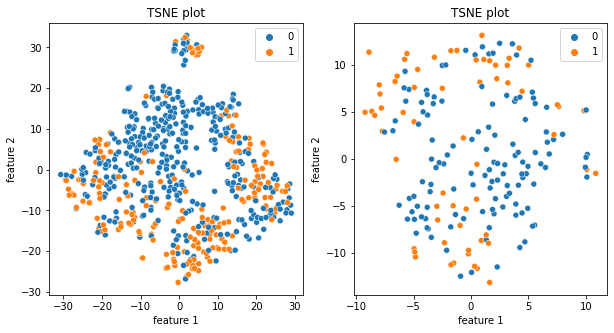

In [ ]:
#Splitting
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
x_train,x_test,y_train,y_test = split(x,y)

#knn
y_knn = knn(x_train,y_train,x_test)
acc_knn = accuracy(y_test,y_knn)

#Logistic Regression
y_lr = lr(x_train,y_train,x_test)
acc_lr = accuracy(y_test,y_lr)

#TSNE
figsize(10,5)

plt.subplot(1,2,1)
tsne(x_train,y_train)
plt.subplot(1,2,2)
tsne(x_test,y_test)

print(acc_knn)
print(acc_lr)

## Question 2 

0.15832264627316492

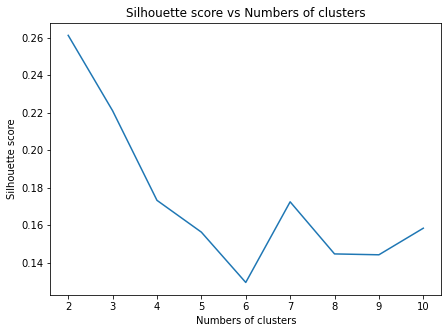

In [ ]:
figsize(7,5)
Silhouette(x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

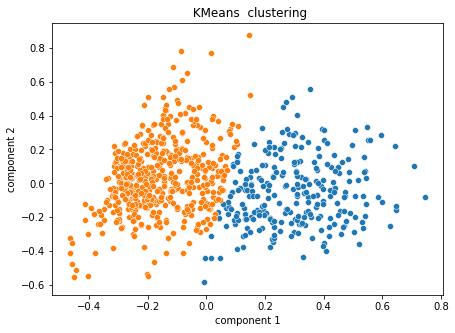

In [ ]:
#KMeans clustering
figsize(7,5)
x_train_pca,x_test_pca = pca(2,x_train,x_test)
x_new_pca = np.concatenate((x_train_pca,x_test_pca))
y_kmeans = kmeans(2,x_new_pca)
sns.scatterplot(x_new_pca[y_kmeans == 0,0],x_new_pca[y_kmeans == 0,1])
sns.scatterplot(x_new_pca[y_kmeans == 1,0],x_new_pca[y_kmeans == 1,1])
plt.title(' KMeans  clustering')
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.show

## Question 3

In [ ]:
lr_pca = []
knn_pca = []

for i in range(1,8):
  #knn
  x_train_pca,x_test_pca = pca(i,x_train,x_test)
  y_knn_pca = knn(x_train_pca,y_train,x_test_pca)
  acc_knn_pca = accuracy(y_test,y_knn_pca)
  knn_pca.append(acc_knn_pca)

  #Logistic Regression
  y_lr_pca = lr(x_train_pca,y_train,x_test_pca)
  acc_lr_pca = accuracy(y_test,y_lr_pca)
  lr_pca.append(acc_lr_pca)

print("Accuracies of KNN: ",knn_pca)
print("Accuracies of LR: ",lr_pca)
print(np.argmax(knn_pca),': ', knn_pca[np.argmax(knn_pca)])
print(np.argmax(lr_pca), ': ', lr_pca[np.argmax(lr_pca)])

Accuracies of KNN:  [0.675392670157068, 0.7329842931937173, 0.7539267015706806, 0.7329842931937173, 0.7591623036649214, 0.7591623036649214, 0.7643979057591623]
Accuracies of LR:  [0.7120418848167539, 0.7120418848167539, 0.7643979057591623, 0.7643979057591623, 0.7643979057591623, 0.7591623036649214, 0.7905759162303665]
6 :  0.7643979057591623
6 :  0.7905759162303665


In [ ]:
x_train_pca,x_test_pca = pca(7,x_train,x_test)

#knn
y_knn_pca = knn(x_train_pca,y_train,x_test_pca)
acc_knn_pca = accuracy(y_test,y_knn_pca)

#Logistic Regression
y_lr_pca = lr(x_train_pca,y_train,x_test_pca)
acc_lr_pca = accuracy(y_test,y_lr_pca)


#Concatenate all data 
x_pca = np.concatenate((x_train_pca,x_test_pca))

print("Accuracy of KNN: ",acc_knn_pca)
print("Accuracy of LR: ",acc_lr_pca)

Accuracy of KNN:  0.7643979057591623
Accuracy of LR:  0.7905759162303665


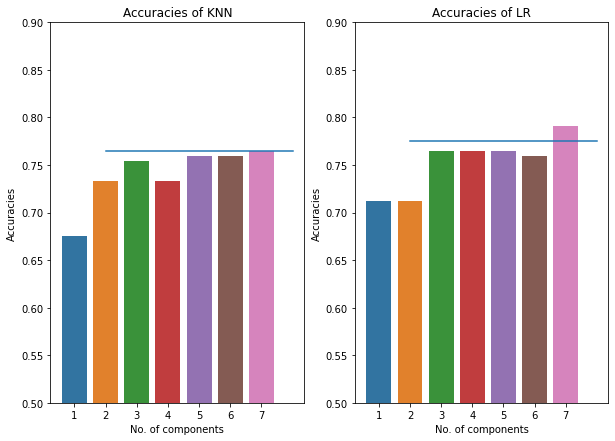

In [ ]:
bar(knn_pca,lr_pca,acc_knn,acc_lr)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Text(0.5, 1.0, 'TSNE after PCA for testing set')

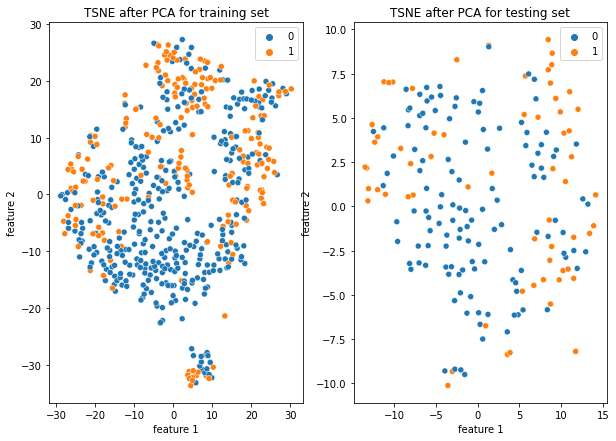

In [ ]:
plt.subplot(1,2,1)
tsne(x_train_pca,y_train)
plt.title('TSNE after PCA for training set')
plt.subplot(1,2,2)
tsne(x_test_pca,y_test)
plt.title('TSNE after PCA for testing set')

## Question 4

Filter method

In [ ]:
knn_chi2 = []
lr_chi2 = []
knn_fclassif = []
lr_fclassif = []

for i in range(1,8):
  #chi2
  x_train_chi2,x_test_chi2,features_names_chi2 = selectkbest(chi2,i,x_train,y_train,x_test)
  #knn
  y_knn_chi2 = knn(x_train_chi2,y_train,x_test_chi2)
  acc_knn_chi2 = accuracy(y_test,y_knn_chi2)
  knn_chi2.append(acc_knn_chi2)
  #Logistic Regression
  y_lr_chi2 = lr(x_train_chi2,y_train,x_test_chi2)
  acc_lr_chi2 = accuracy(y_test,y_lr_chi2)
  lr_chi2.append(acc_lr_chi2)

  #f_classif
  x_train_fclassif,x_test_fclassif,features_names_fclassif = selectkbest(f_classif,i,x_train,y_train,x_test)
  #knn
  y_knn_fclassif = knn(x_train_fclassif,y_train,x_test_fclassif)
  acc_knn_fclassif = accuracy(y_test,y_knn_fclassif)
  knn_fclassif.append(acc_knn_fclassif)
  #Logistic Regression
  y_lr_fclassif = lr(x_train_fclassif,y_train,x_test_fclassif)
  acc_lr_fclassif = accuracy(y_test,y_lr_fclassif)
  lr_fclassif.append(acc_lr_fclassif)

print('Accuracies of KNN with chi2: ',knn_chi2)
print('Accuracies of LR with chi2: ',lr_chi2)
print('Accuracies of KNN with f_classif: ',knn_fclassif)
print('Accuracies of LR with f_classif: ',lr_fclassif)
print('Max of KNN with chi2 index: ',np.argmax(knn_chi2),"Which are: ",knn_chi2[np.argmax(knn_chi2)])
print('Max of LR with chi2 index: ',np.argmax(lr_chi2),"Which are: ",lr_chi2[np.argmax(lr_chi2)])
print('Max of KNN with f_classif index: ',np.argmax(knn_fclassif),"Which are: ",knn_fclassif[np.argmax(knn_fclassif)])
print('Max of LR with f_classif index: ',np.argmax(lr_fclassif),"Which are: ",lr_fclassif[np.argmax(lr_fclassif)])

Accuracies of KNN with chi2:  [0.6963350785340314, 0.7382198952879581, 0.7643979057591623, 0.774869109947644, 0.8010471204188482, 0.7853403141361257, 0.7643979057591623]
Accuracies of LR with chi2:  [0.6544502617801047, 0.7801047120418848, 0.7853403141361257, 0.7801047120418848, 0.7853403141361257, 0.7801047120418848, 0.7853403141361257]
Accuracies of KNN with f_classif:  [0.7643979057591623, 0.7539267015706806, 0.7696335078534031, 0.774869109947644, 0.7591623036649214, 0.7853403141361257, 0.7643979057591623]
Accuracies of LR with f_classif:  [0.7591623036649214, 0.774869109947644, 0.7853403141361257, 0.7905759162303665, 0.7801047120418848, 0.7801047120418848, 0.7853403141361257]
Max of KNN with chi2 index:  4 Which are:  0.8010471204188482
Max of LR with chi2 index:  2 Which are:  0.7853403141361257
Max of KNN with f_classif index:  5 Which are:  0.7853403141361257
Max of LR with f_classif index:  3 Which are:  0.7905759162303665


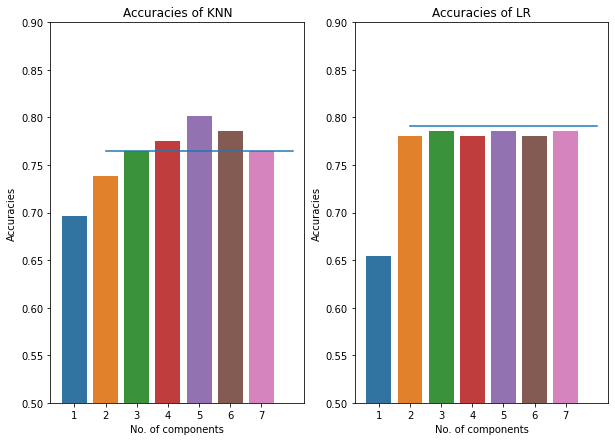

In [ ]:
#chi2
bar(knn_chi2,lr_chi2,acc_knn_pca,acc_lr_pca)

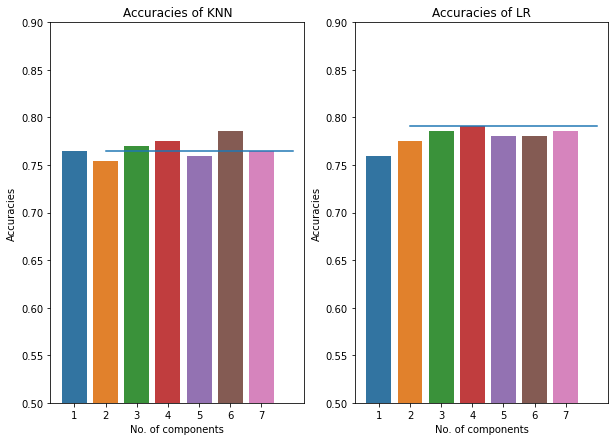

In [ ]:
#f_classif
bar(knn_fclassif,lr_fclassif,acc_knn_pca,acc_lr_pca)

chi2 is better than fclassif

In [ ]:
#chi2
#knn
x_train_knn_chi2,x_test_knn_chi2,features_names_chi2 = selectkbest(chi2,5,x_train,y_train,x_test)
y_knn_chi2 = knn(x_train_knn_chi2,y_train,x_test_knn_chi2)
acc_knn_chi2 = accuracy(y_test,y_knn_chi2)

#Logistic Regression
x_train_lr_chi2,x_test_lr_chi2,features_names_chi2 = selectkbest(chi2,3,x_train,y_train,x_test) 
y_lr_chi2 = lr(x_train_lr_chi2,y_train,x_test_lr_chi2)
acc_lr_chi2 = accuracy(y_test,y_lr_chi2)

print('Best accuracy of KNN with chi2: ', acc_knn_chi2)
print('Best accuracy of LR with chi2: ',acc_lr_chi2)

Best accuracy of KNN with chi2:  0.8010471204188482
Best accuracy of LR with chi2:  0.7853403141361257


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

Text(0.5, 1.0, 'TSNE for LR after chi2 for testing set')

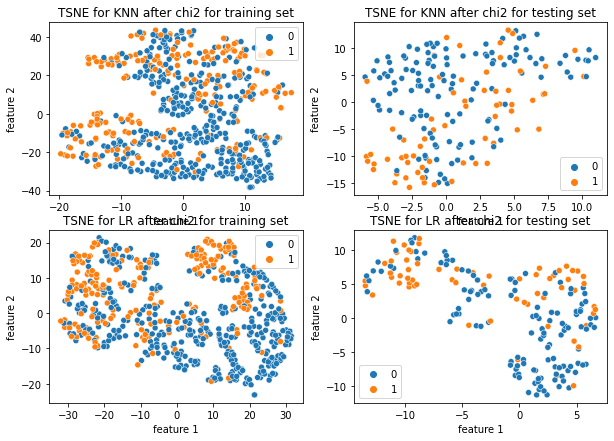

In [ ]:
plt.subplot(2,2,1)
tsne(x_train_knn_chi2,y_train)
plt.title('TSNE for KNN after chi2 for training set')
plt.subplot(2,2,2)
tsne(x_test_knn_chi2,y_test)
plt.title('TSNE for KNN after chi2 for testing set')
plt.subplot(2,2,3)
tsne(x_train_lr_chi2,y_train)
plt.title('TSNE for LR after chi2 for training set')
plt.subplot(2,2,4)
tsne(x_test_lr_chi2,y_test)
plt.title('TSNE for LR after chi2 for testing set')

Wrapper method

In [ ]:
knn_forward = []
lr_forward = []
knn_backward = []
lr_backward = []
knn_rfe = []
lr_rfe = []

for i in range(1,8):
  #forward
  #knn
  x_train_knn_forward,x_test_knn_forward,features_names_knn_forward = wrapper(KNeighborsClassifier(n_neighbors=5),'forward',i,x_train,y_train,x_test)
  y_knn_forward = knn(x_train_knn_forward,y_train,x_test_knn_forward)
  acc_knn_forward = accuracy(y_test,y_knn_forward)
  knn_forward.append(acc_knn_forward)
  #Logistic Regression
  x_train_lr_forward,x_test_lr_forward,features_names_lr_forward = wrapper(LogisticRegression(),'forward',i,x_train,y_train,x_test)
  y_lr_forward = lr(x_train_lr_forward,y_train,x_test_lr_forward)
  acc_lr_forward = accuracy(y_test,y_lr_forward)
  lr_forward.append(acc_lr_forward)

  #Backward
  #knn
  x_train_knn_backward,x_test_knn_backward,features_names_knn_backward = wrapper(KNeighborsClassifier(n_neighbors=5),'backward',i,x_train,y_train,x_test)
  y_knn_backward = knn(x_train_knn_backward,y_train,x_test_knn_backward)
  acc_knn_backward = accuracy(y_test,y_knn_backward)
  knn_backward.append(acc_knn_backward)
  #Logistic Regression
  x_train_lr_backward,x_test_lr_backward,features_names_lr_backward = wrapper(LogisticRegression(),'backward',i,x_train,y_train,x_test)
  y_lr_backward = lr(x_train_lr_backward,y_train,x_test_lr_backward)
  acc_lr_backward = accuracy(y_test,y_lr_backward)
  lr_backward.append(acc_lr_backward)

  #Recursive
  #knn
  x_train_knn_rfe,x_test_knn_rfe,features_names_knn_rfe = recursive(DecisionTreeClassifier(),i,x_train,y_train,x_test)
  y_knn_rfe = knn(x_train_knn_rfe,y_train,x_test_knn_rfe)
  acc_knn_rfe = accuracy(y_test,y_knn_rfe)
  knn_rfe.append(acc_knn_rfe)

  #Logistic Regression
  x_train_lr_rfe,x_test_lr_rfe,features_names_lr_rfe = recursive(LogisticRegression(),i,x_train,y_train,x_test)
  y_lr_rfe = lr(x_train_lr_rfe,y_train,x_test_lr_rfe)
  acc_lr_rfe = accuracy(y_test,y_lr_rfe)
  lr_rfe.append(acc_lr_rfe)

print('Accuracies of KNN with forward feature selection: ',knn_forward)
print('Accuracies of LR with forward feature selection: ',lr_forward)
print('Accuracies of KNN with backward feature selection: ',knn_backward)
print('Accuracies of LR with backward feature selection: ',lr_backward)
print('Accuracies of KNN with recursive feature selection: ',knn_rfe)
print('Accuracies of LR with recursive feature selection: ',lr_rfe)
print('Max accuracy with KNN with forward feature selection index: ',np.argmax(knn_forward),'Which are: ',knn_forward[np.argmax(knn_forward)])
print('Max accuracy with LR with forward feature selection index: ',np.argmax(lr_forward),'Which are: ',lr_forward[np.argmax(lr_forward)])
print('Max accuracy with KNN with backward feature selection index: ',np.argmax(knn_backward),'Which are: ',knn_backward[np.argmax(knn_backward)])
print('Max accuracy with LR with backward feature selection index: ',np.argmax(lr_backward),'Which are: ',lr_backward[np.argmax(lr_backward)])
print('Max accuracy with KNN with recursive feature selection index: ',np.argmax(knn_rfe),'Which are: ',knn_rfe[np.argmax(knn_rfe)])
print('Max accuracy with LR with recursive feature selection index: ',np.argmax(lr_rfe),'Which are: ',lr_rfe[np.argmax(lr_rfe)])

Accuracies of KNN with forward feature selection:  [0.7643979057591623, 0.7591623036649214, 0.7539267015706806, 0.7958115183246073, 0.7696335078534031, 0.774869109947644, 0.7591623036649214]
Accuracies of LR with forward feature selection:  [0.7591623036649214, 0.774869109947644, 0.7853403141361257, 0.7696335078534031, 0.7801047120418848, 0.7853403141361257, 0.7853403141361257]
Accuracies of KNN with backward feature selection:  [0.7643979057591623, 0.7591623036649214, 0.7591623036649214, 0.7905759162303665, 0.7905759162303665, 0.7905759162303665, 0.7853403141361257]
Accuracies of LR with backward feature selection:  [0.7591623036649214, 0.774869109947644, 0.7801047120418848, 0.7801047120418848, 0.7801047120418848, 0.7801047120418848, 0.7853403141361257]
Accuracies of KNN with recursive feature selection:  [0.6387434554973822, 0.7539267015706806, 0.7486910994764397, 0.774869109947644, 0.7958115183246073, 0.7853403141361257, 0.7539267015706806]
Accuracies of LR with recursive feature se

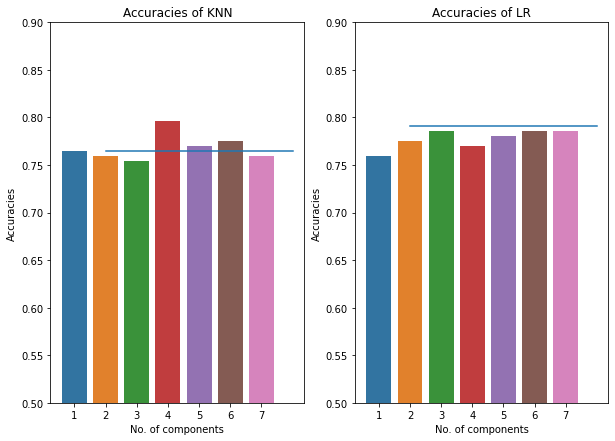

In [ ]:
#Forward feature selection
bar(knn_forward,lr_forward,acc_knn_pca,acc_lr_pca)

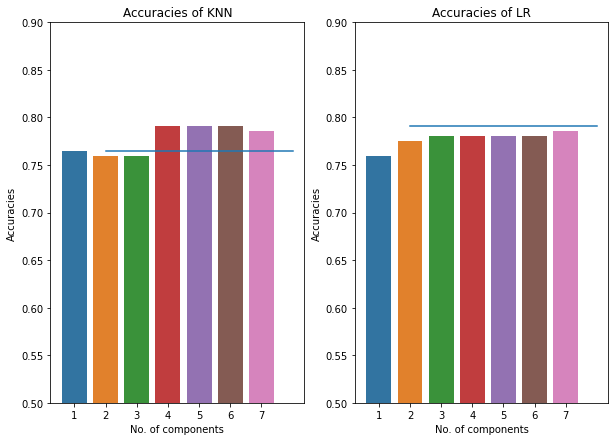

In [ ]:
#Backward feature selection
bar(knn_backward,lr_backward,acc_knn_pca,acc_lr_pca)

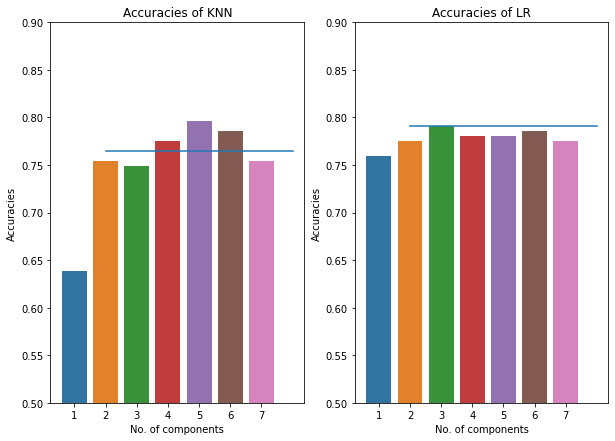

In [ ]:
#Recursive feature selection
bar(knn_rfe,lr_rfe,acc_knn_pca,acc_lr_pca)

Recursive feature selection is the best

In [ ]:
#KNN
x_train_knn_rfe,x_test_knn_rfe,features_names_knn_rfe = recursive(DecisionTreeClassifier(),5,x_train,y_train,x_test)
y_knn_rfe = knn(x_train_knn_rfe,y_train,x_test_knn_rfe)
acc_knn_rfe = accuracy(y_test,y_knn_rfe)

#Logistic Regression
x_train_lr_rfe,x_test_lr_rfe,features_names_lr_rfe = recursive(LogisticRegression(),3,x_train,y_train,x_test)
y_lr_rfe = lr(x_train_lr_rfe,y_train,x_test_lr_rfe)
acc_lr_rfe = accuracy(y_test,y_lr_rfe)

print('Best accuracy of KNN with recursive feature selections',acc_knn_rfe)
print('Features name used in KNN: ', features_names_knn_rfe)
print('Best accuracy of LR with recursive feature selections',acc_lr_rfe)
print('Features name used in LR: ', features_names_lr_rfe)

Best accuracy of KNN with recursive feature selections 0.7958115183246073
Features name used in KNN:  ['Glucose' 'BloodPressure' 'BMI' 'DiabetesPedigreeFunction' 'Age']
Best accuracy of LR with recursive feature selections 0.7905759162303665
Features name used in LR:  ['Pregnancies' 'Glucose' 'BMI']


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

Text(0.5, 1.0, 'TSNE for LR after recursive for testing set')

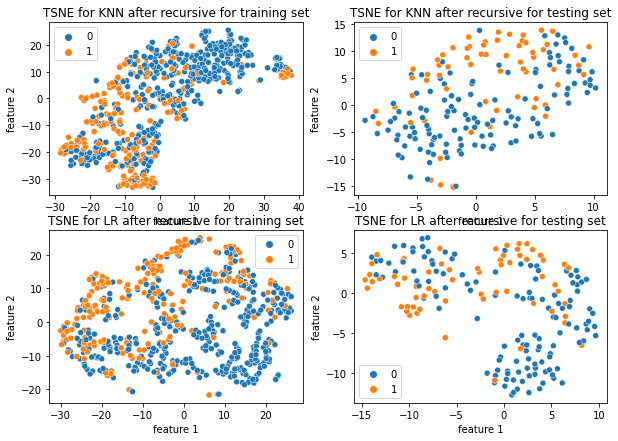

In [ ]:
#TSNE 
plt.subplot(2,2,1)
tsne(x_train_knn_rfe,y_train)
plt.title('TSNE for KNN after recursive for training set')
plt.subplot(2,2,2)
tsne(x_test_knn_rfe,y_test)
plt.title('TSNE for KNN after recursive for testing set')
plt.subplot(2,2,3)
tsne(x_train_lr_rfe,y_train)
plt.title('TSNE for LR after recursive for training set')
plt.subplot(2,2,4)
tsne(x_test_lr_rfe,y_test)
plt.title('TSNE for LR after recursive for testing set')

## Question 5

KMeans for PCA

0.1837896906795054

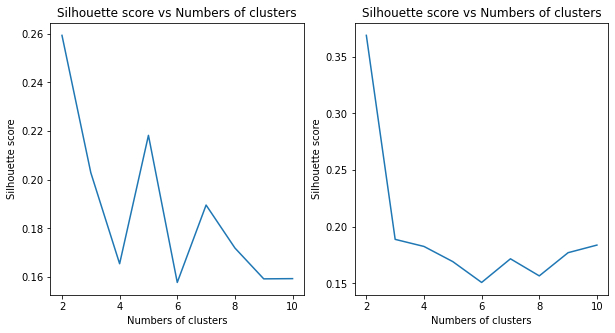

In [ ]:
figsize(10,5)
plt.subplot(1,2,1)
Silhouette(x_train_pca)
plt.subplot(1,2,2)
Silhouette(x_test_pca)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

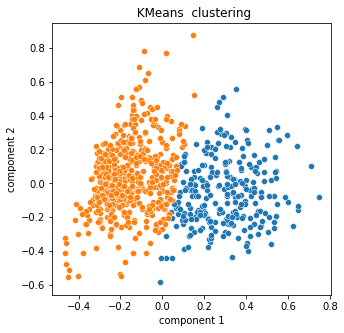

In [ ]:
#KMeans  clustering
x_train_pca_new,x_test_pca_new = pca(2,x_train_pca,x_test_pca)
x_pca_fs = np.concatenate((x_train_pca_new,x_test_pca_new))
y_kmeans = kmeans(2,x_pca_fs)
figsize(5,5)
sns.scatterplot(x_pca_fs[y_kmeans == 0,0],x_pca_fs[y_kmeans == 0,1])
sns.scatterplot(x_pca_fs[y_kmeans == 1,0],x_pca_fs[y_kmeans == 1,1])
plt.title(' KMeans  clustering')
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.show

KMeans for forward feature selection

0.2548591463856106

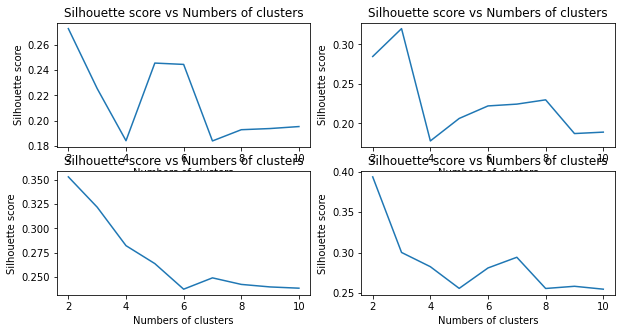

In [ ]:
figsize(10,5)
plt.subplot(2,2,1)
Silhouette(x_train_knn_rfe)
plt.subplot(2,2,2)
Silhouette(x_test_knn_rfe)
plt.subplot(2,2,3)
Silhouette(x_train_lr_rfe)
plt.subplot(2,2,4)
Silhouette(x_test_lr_rfe)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

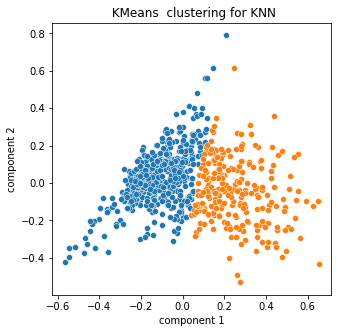

In [ ]:
x_train_pca_new,x_test_pca_new = pca(2,x_train_knn_rfe,x_test_knn_rfe)
x_rfe_pca = np.concatenate((x_train_pca_new,x_test_pca_new))
y_kmeans = kmeans(2,x_rfe_pca)
figsize(5,5)
sns.scatterplot(x_rfe_pca[y_kmeans == 0,0],x_rfe_pca[y_kmeans == 0,1])
sns.scatterplot(x_rfe_pca[y_kmeans == 1,0],x_rfe_pca[y_kmeans == 1,1])
plt.title(' KMeans  clustering for KNN')
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

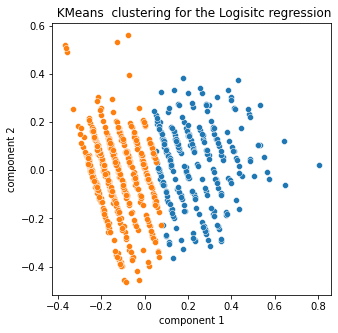

In [ ]:
x_train_pca_new,x_test_pca_new = pca(2,x_train_lr_rfe,x_test_lr_rfe)
x_rfe_pca_lr = np.concatenate((x_train_pca_new,x_test_pca_new))
y_kmeans = kmeans(2,x_rfe_pca_lr)
figsize(5,5)
sns.scatterplot(x_rfe_pca_lr[y_kmeans == 0,0],x_rfe_pca_lr[y_kmeans == 0,1])
sns.scatterplot(x_rfe_pca_lr[y_kmeans == 1,0],x_rfe_pca_lr[y_kmeans == 1,1])
plt.title(' KMeans  clustering for the Logisitc regression')
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.show

## Question 6


a) Plot the silhouette score vs the number of neurons

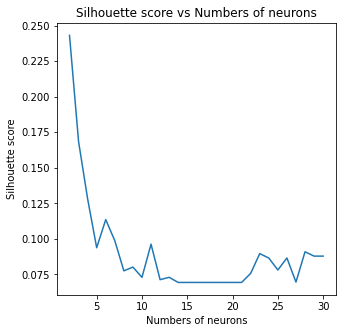

In [ ]:
# we used the best features from q3 which called : (x_pca)
som_x_pca=silhoutte_n_neuron(x_pca)  

In [ ]:
print(x_pca.shape)
print(x_pca.shape)

(767, 7)
(767, 7)


b) the value of the optimal number of neurons 

In [ ]:
best_x_pca=np.argmax(som_x_pca)
som_x_pca[best_x_pca]

0.24317409249397146

c) Plot the initial and final Neuron positions
  - Plot the initial Neuron positions

In [ ]:
x_pca.shape

(767, 7)

In [ ]:
# Initialization and training
som_shape = (2, 1)
som = MiniSom(som_shape[0],som_shape[1], x_pca.shape[1], random_seed=0)
intial = np.array(som.get_weights())
som.train_batch(x_pca,2000, verbose=True)
finial = np.array(som.get_weights())

 [  816 / 2000 ]  41% - 0:00:00 left 

/usr/local/lib/python3.7/dist-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 0.37416593953292715


In [ ]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in x_pca]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

In [ ]:
cluster_index

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,

In [ ]:
intial.shape

(2, 1, 7)

In [ ]:

intial = intial.reshape(intial.shape[0],x_pca.shape[1])
finial = finial.reshape(finial.shape[0],x_pca.shape[1])

In [ ]:
intial

array([[ 0.16069505,  0.70840777,  0.33829913,  0.14775635, -0.25132995,
         0.48028639, -0.20546417],
       [ 0.48453665,  0.57344839, -0.14415709,  0.36079942,  0.03573663,
         0.08415609,  0.52636901]])

In [ ]:
finial

array([[ 0.19433634, -0.0733264 ,  0.02816359, -0.02230897,  0.0042302 ,
        -0.04862309,  0.03654185],
       [-0.14324222,  0.12814719,  0.03732493,  0.00949006, -0.02485965,
        -0.04365312, -0.00722865]])

<function matplotlib.pyplot.show>

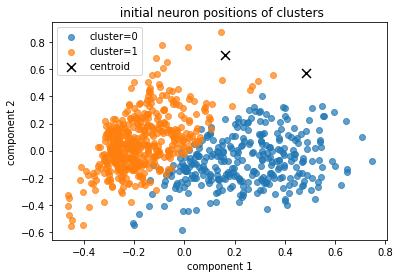

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(x_pca[cluster_index == c, 0],
                x_pca[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
plt.scatter(intial[:, 0], intial[:, 1], marker='x', 
                s=80, linewidths=35, color='k', label='centroid')
plt.legend();
plt.title(' initial neuron positions of clusters')
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.show


Plot the final Neuron positions

<function matplotlib.pyplot.show>

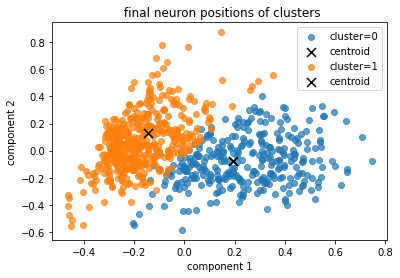

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(x_pca[cluster_index == c, 0],
                x_pca[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
    plt.scatter(finial[:, 0], finial[:, 1], marker='x', 
                s=80, linewidths=35, color='k', label='centroid')
    
plt.legend();
plt.title(' final neuron positions of clusters')
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.show

## Question 7

In [ ]:
#find DBSCAN optimal eps and min-samples 
from tqdm import tqdm
from sklearn.cluster import KMeans, DBSCAN
from sklearn.utils.multiclass import unique_labels
epsList, msList, accList ,pred_N_Cluster= list(), list(), list(),list()
eps_minPoints=[]

for eps in tqdm(np.arange(0.3,0.7,0.1)):
  for ms in range(2, 15,1):
    model = DBSCAN(eps=eps, min_samples=ms)
    predLabels = model.fit_predict(x)
    # print(predLabels)
    score = silhouette_score(x, predLabels, random_state=0)
    epsList.append(eps)
    msList.append(ms)
    accList.append(score)
    eps_minPoints.append((eps,ms))
    pred_N_Cluster.append(len(unique_labels(predLabels)))

epsList, msList, accList = np.array(epsList), np.array(msList), np.array(accList)
print(eps_minPoints)
print(accList)
print(pred_N_Cluster)


100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

[(0.3, 2), (0.3, 3), (0.3, 4), (0.3, 5), (0.3, 6), (0.3, 7), (0.3, 8), (0.3, 9), (0.3, 10), (0.3, 11), (0.3, 12), (0.3, 13), (0.3, 14), (0.4, 2), (0.4, 3), (0.4, 4), (0.4, 5), (0.4, 6), (0.4, 7), (0.4, 8), (0.4, 9), (0.4, 10), (0.4, 11), (0.4, 12), (0.4, 13), (0.4, 14), (0.5, 2), (0.5, 3), (0.5, 4), (0.5, 5), (0.5, 6), (0.5, 7), (0.5, 8), (0.5, 9), (0.5, 10), (0.5, 11), (0.5, 12), (0.5, 13), (0.5, 14), (0.6000000000000001, 2), (0.6000000000000001, 3), (0.6000000000000001, 4), (0.6000000000000001, 5), (0.6000000000000001, 6), (0.6000000000000001, 7), (0.6000000000000001, 8), (0.6000000000000001, 9), (0.6000000000000001, 10), (0.6000000000000001, 11), (0.6000000000000001, 12), (0.6000000000000001, 13), (0.6000000000000001, 14)]
[0.12427501 0.18144829 0.25570374 0.25550342 0.25071393 0.25569042
 0.25546474 0.24137344 0.23483044 0.23167176 0.22396659 0.28383905
 0.28248988 0.28693763 0.41150418 0.40738576 0.39902473 0.39902473
 0.39902473 0.39475775 0.39208884 0.39133404 0.39133404 0.39133

In [ ]:
df = pd.DataFrame({"epsilon":epsList,           # Create pandas DataFrame
                     "minpoints":msList,
                     "sillouhtte":accList,
                     "N_Cluster":pred_N_Cluster})
print(df)                                        # Print pandas DataFrame

    epsilon  minpoints  sillouhtte  N_Cluster
0       0.3          2    0.124275          6
1       0.3          3    0.181448          4
2       0.3          4    0.255704          4
3       0.3          5    0.255503          4
4       0.3          6    0.250714          4
5       0.3          7    0.255690          3
6       0.3          8    0.255465          3
7       0.3          9    0.241373          3
8       0.3         10    0.234830          3
9       0.3         11    0.231672          3
10      0.3         12    0.223967          3
11      0.3         13    0.283839          2
12      0.3         14    0.282490          2
13      0.4          2    0.286938          3
14      0.4          3    0.411504          2
15      0.4          4    0.407386          2
16      0.4          5    0.399025          2
17      0.4          6    0.399025          2
18      0.4          7    0.399025          2
19      0.4          8    0.394758          2
20      0.4          9    0.392089

The best 10 combinations of epsilon and minpoints that brings us closer to the
desired cluster number with the highest silhouette score

In [ ]:
data=df.nlargest(10,['sillouhtte'])
data

,epsilon,minpoints,sillouhtte,N_Cluster
28,0.5,4,0.485008,2
29,0.5,5,0.485008,2
30,0.5,6,0.485008,2
31,0.5,7,0.485008,2
46,0.6,9,0.485008,2
47,0.6,10,0.485008,2
48,0.6,11,0.485008,2
49,0.6,12,0.485008,2
50,0.6,13,0.485008,2
51,0.6,14,0.485008,2


 epsilon vs number of clusters for the 10 combinations

<function matplotlib.pyplot.show>

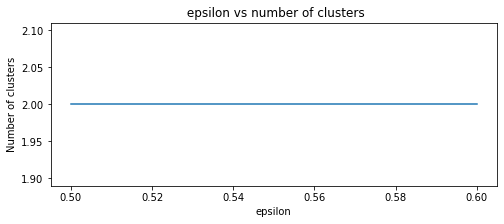

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(data['epsilon'],data['N_Cluster'])
plt.title(' epsilon vs number of clusters')
plt.xlabel("epsilon")
plt.ylabel("Number of clusters")
plt.show

minpoints vs number of clusters for the 10 combinations

<function matplotlib.pyplot.show>

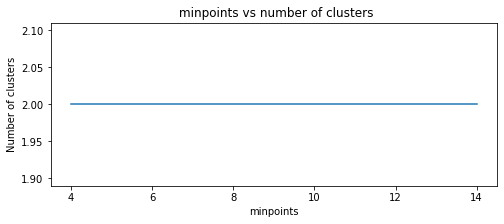

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(data['minpoints'],data['N_Cluster'])
plt.title(' minpoints vs number of clusters')
plt.xlabel("minpoints")
plt.ylabel("Number of clusters")
plt.show